# Analysis: air quality and asthma prevalence

In [16]:
# Dependencies
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
from pprint import pprint
from scipy import stats

# Dependencies (local modules)
from countries import get_country

## Import air quality and asthma data
### Cleaned datasets
- cleaned_asthma_prevalence.csv
- cleaned_airquality.csv

In [2]:
# Import CSV to DataFrames
csv_airquality = Path("Cleaned_Datasets/cleaned_airquality.csv")
csv_asthma = Path("Cleaned_Datasets/cleaned_asthma_prevalence.csv")

airquality_df = pd.read_csv(csv_airquality)
asthma_df = pd.read_csv(csv_asthma)

In [3]:
# Air quality data uses country code instead of country name

# Iterate through the DataFrame
for index, row in airquality_df.iterrows():
    # Replace the country code by the country name
    airquality_df.loc[index,'Country'] = get_country(airquality_df.loc[index,'Country'])

# List all the countries in the air quality DataFrame
airquality_countries = airquality_df['Country'].unique().tolist()
print(f"{len(airquality_countries)} countries found.")
pprint(airquality_countries)

93 countries found.
['United Arab Emirates',
 'Afghanistan',
 'Argentina',
 'Austria',
 'Australia',
 'Bosnia and Herzegovina',
 'Bangladesh',
 'Belgium',
 'Bulgaria',
 'Bahrain',
 'Brazil',
 'Canada',
 'Switzerland',
 "Cote d'Ivoire",
 'Chile',
 'China',
 'Colombia',
 'Costa Rica',
 'Curaçao',
 'Cyprus',
 'Czechia',
 'Germany',
 'Denmark',
 'Algeria',
 'Ecuador',
 'Estonia',
 'Spain',
 'Ethiopia',
 'Finland',
 'France',
 'United Kingdom of Great Britain and Northern Ireland',
 'Georgia',
 'Ghana',
 'Guinea',
 'Greece',
 'Guatemala',
 'Hong Kong',
 'Croatia',
 'Hungary',
 'Indonesia',
 'Ireland',
 'Israel',
 'India',
 'Iraq',
 'Iran (Islamic Republic of)',
 'Iceland',
 'Italy',
 'Jordan',
 'Japan',
 'Kyrgyzstan',
 'Republic of Korea',
 'Kuwait',
 'Kazakhstan',
 "Lao People's Democratic Republic",
 'Sri Lanka',
 'Lithuania',
 'North Macedonia',
 'Mali',
 'Myanmar',
 'Mongolia',
 'Macao',
 'Mexico',
 'The Netherlands',
 'Norway',
 'Nepal',
 'New Zealand',
 'Peru',
 'Philippines',
 'Pakis

In [7]:
# Simplify the name of the data column in the asthma DataFrame
asthma_df = asthma_df.rename(columns={"Asthma Cases per 100 - Age-Std - Both Sex": "Asthma"})

# List all the countries in the asthma DataFrame
asthma_countries = asthma_df['Country'].unique().tolist()
print(f"{len(asthma_countries)} countries found.")
pprint(asthma_countries)

226 countries found.
['Afghanistan',
 'African Region (WHO)',
 'Albania',
 'Algeria',
 'American Samoa',
 'Andorra',
 'Angola',
 'Antigua and Barbuda',
 'Argentina',
 'Armenia',
 'Australia',
 'Austria',
 'Azerbaijan',
 'Bahamas',
 'Bahrain',
 'Bangladesh',
 'Barbados',
 'Belarus',
 'Belgium',
 'Belize',
 'Benin',
 'Bermuda',
 'Bhutan',
 'Bolivia',
 'Bosnia and Herzegovina',
 'Botswana',
 'Brazil',
 'Brunei',
 'Bulgaria',
 'Burkina Faso',
 'Burundi',
 'Cambodia',
 'Cameroon',
 'Canada',
 'Cape Verde',
 'Central African Republic',
 'Chad',
 'Chile',
 'China',
 'Colombia',
 'Comoros',
 'Congo',
 'Cook Islands',
 'Costa Rica',
 "Cote d'Ivoire",
 'Croatia',
 'Cuba',
 'Cyprus',
 'Czechia',
 'Democratic Republic of Congo',
 'Denmark',
 'Djibouti',
 'Dominica',
 'Dominican Republic',
 'East Asia & Pacific (WB)',
 'East Timor',
 'Eastern Mediterranean Region (WHO)',
 'Ecuador',
 'Egypt',
 'El Salvador',
 'England',
 'Equatorial Guinea',
 'Eritrea',
 'Estonia',
 'Eswatini',
 'Ethiopia',
 'Europ

## Merge DataFrames
- Merged on country and year
- Only countries and years present in both files are kept

In [9]:
# Merge the two DataFrames and keep only the countries that are in both
analysis_df = pd.merge(airquality_df, asthma_df, on=["Country", "Year"], how="inner")
analysis_df.head()

,Country,Year,PM25,Asthma
0,United Arab Emirates,2015,118.714286,8.349840
1,United Arab Emirates,2016,92.000000,7.665928
2,United Arab Emirates,2018,122.683432,7.069434
3,United Arab Emirates,2019,111.881940,7.179908
4,Afghanistan,2019,187.457627,4.281019


## Data analysis

### Correlation between PM25 concentration and prevalence of asthma
We first look at the overall correlation by pulling the data for PM25 and asthma for all countries and all years at once.

R-value: -0.51
Linear model: -0.0275 * [PM25] + 6.25


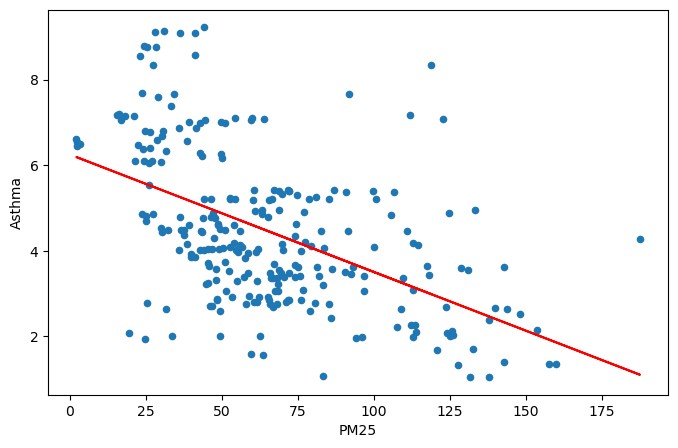

In [25]:
# Show a scatter plot of PM25 versus Asthma prevalence for all countries and all years
analysis_df.plot.scatter(x='PM25',y='Asthma', figsize=(8,5))

# Create a linear regression model based on the PM25 and Asthma data
x_data = analysis_df['PM25']
y_data = analysis_df['Asthma']
[slope, intercept, rvalue, pvalue, stdeve] = stats.linregress(x_data,y_data)
print(f"R-value: {rvalue:.2f}")
print(f"Linear model: [Asthma] = {slope:.4f} * [PM25] + {intercept:.2f}")

y_reg = slope*x_data+intercept
plt.plot(x_data,y_reg,'r-')

# Show plot
plt.show()